# Data Preparation


This phase focuses on preparing the data for modeling. We will clean, select, integrate, format, and construct the data ensuring its quality for the next steps.

## Import Libraries

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [59]:
import warnings
warnings.filterwarnings('ignore', message="^Columns.*")
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv("used_cars_data.csv") 

In [60]:
# Check the data types of columns
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

vin: object
back_legroom: object
bed: object
bed_height: object
bed_length: object
body_type: object
cabin: object
city: object
city_fuel_economy: float64
combine_fuel_economy: float64
daysonmarket: int64
dealer_zip: object
description: object
engine_cylinders: object
engine_displacement: float64
engine_type: object
exterior_color: object
fleet: object
frame_damaged: object
franchise_dealer: bool
franchise_make: object
front_legroom: object
fuel_tank_volume: object
fuel_type: object
has_accidents: object
height: object
highway_fuel_economy: float64
horsepower: float64
interior_color: object
isCab: object
is_certified: float64
is_cpo: object
is_new: bool
is_oemcpo: object
latitude: float64
length: object
listed_date: object
listing_color: object
listing_id: int64
longitude: float64
main_picture_url: object
major_options: object
make_name: object
maximum_seating: object
mileage: float64
model_name: object
owner_count: float64
power: object
price: float64
salvage: object
savings_amount: i

## Data Selection
Identify and document the relevant data for our analysis.

In [61]:
# Define relevant columns based on important features deduced in the previous phase
# Let's drop also feature engine_cylinders since it seems to be reduntant with engine_type
features_to_keep = ['back_legroom', 'body_type', "city_fuel_economy", "combine_fuel_economy", 'daysonmarket',
                    'engine_displacement', 'engine_type', 'front_legroom', 'fuel_tank_volume',
                    'fuel_type', 'height', "highway_fuel_economy", 'horsepower', 'interior_color', 'length',
                    'listing_color', 'major_options', 'make_name', 'maximum_seating', 'mileage',
                    'model_name', 'price', "savings_amount", 'seller_rating', 'torque', 'transmission',
                    'wheel_system', 'wheelbase', 'width', 'year',]
df = df[features_to_keep]

# Check the features
print("Column values of the fifth car: \n")
for column in df.columns:
    value = df.loc[4, column]
    print(f"{column}: {value}")

Column values of the fifth car: 

back_legroom: 38.1 in
body_type: SUV / Crossover
city_fuel_economy: nan
combine_fuel_economy: nan
daysonmarket: 137
engine_displacement: 2000.0
engine_type: I4
front_legroom: 39.1 in
fuel_tank_volume: 17.7 gal
fuel_type: Gasoline
height: 68 in
highway_fuel_economy: nan
horsepower: 246.0
interior_color: Black (Ebony)
length: 181 in
listing_color: BLACK
major_options: ['Adaptive Cruise Control']
make_name: Land Rover
maximum_seating: 7 seats
mileage: 7.0
model_name: Discovery Sport
price: 48880.0
savings_amount: 0
seller_rating: 3.0
torque: 269 lb-ft @ 1,400 RPM
transmission: A
wheel_system: AWD
wheelbase: 107.9 in
width: 85.6 in
year: 2020


## Clean the Data


### Parse numerical object-type features into numerical type.

In [62]:
# Parse some strings to convert features to numerical values
for column in ['back_legroom', 'front_legroom', "height", "length", "wheelbase", "width"]:
    df[column] = df[column].str.replace(' in', '').replace('--', np.nan).astype(float)


In [63]:
df["fuel_tank_volume"] = df["fuel_tank_volume"].str.replace(' gal', '').replace('--', np.nan).astype(float)

In [64]:
df["maximum_seating"] = df["maximum_seating"].str.replace(' seats', '').replace('--', np.nan).astype(float)

In [65]:
df['torque'] = df['torque'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [66]:
# Convert list of major options to an integer
df['major_options'] = df['major_options'].str.count(',') + 1

In [67]:
# Check the values of features
print("Column values of the fifth car: \n")
for column in df.columns:
    value = df.loc[4, column]
    print(f"{column}: {value}")

Column values of the fifth car: 

back_legroom: 38.1
body_type: SUV / Crossover
city_fuel_economy: nan
combine_fuel_economy: nan
daysonmarket: 137
engine_displacement: 2000.0
engine_type: I4
front_legroom: 39.1
fuel_tank_volume: 17.7
fuel_type: Gasoline
height: 68.0
highway_fuel_economy: nan
horsepower: 246.0
interior_color: Black (Ebony)
length: 181.0
listing_color: BLACK
major_options: 1.0
make_name: Land Rover
maximum_seating: 7.0
mileage: 7.0
model_name: Discovery Sport
price: 48880.0
savings_amount: 0
seller_rating: 3.0
torque: 269.0
transmission: A
wheel_system: AWD
wheelbase: 107.9
width: 85.6
year: 2020


In [68]:
# Check again the datatypes of features
print(df.dtypes)

back_legroom            float64
body_type                object
city_fuel_economy       float64
combine_fuel_economy    float64
daysonmarket              int64
engine_displacement     float64
engine_type              object
front_legroom           float64
fuel_tank_volume        float64
fuel_type                object
height                  float64
highway_fuel_economy    float64
horsepower              float64
interior_color           object
length                  float64
listing_color            object
major_options           float64
make_name                object
maximum_seating         float64
mileage                 float64
model_name               object
price                   float64
savings_amount            int64
seller_rating           float64
torque                  float64
transmission             object
wheel_system             object
wheelbase               float64
width                   float64
year                      int64
dtype: object


### Replace missing values, create new features and drop some features.

In [69]:
# Replace missing values with column mean (or any other suitable value)
for column in ['back_legroom', "city_fuel_economy", "engine_displacement", 'front_legroom', "fuel_tank_volume",
              "height", "highway_fuel_economy", "horsepower", "length", "major_options", "maximum_seating", 
              "mileage", "seller_rating", "torque", "wheelbase", "width"]:
    df[column].fillna(df[column].mean(), inplace=True)

In [70]:
# Create new feature combine_fuel_economy
df['combine_fuel_economy'] = (df['city_fuel_economy'] + df['highway_fuel_economy'])/2

# Let's dropt city fuel economy and highway fuel economy since combined fuel economy contains information about these
df.drop(['city_fuel_economy', 'highway_fuel_economy'], axis=1, inplace=True)

In [71]:
# Create new features legroom and size
df["legroom"] = df["back_legroom"]+ df["front_legroom"]
df["size"] =  df['length']*df['width']*df['height'] + df["maximum_seating"] + df["fuel_tank_volume"]


# Let's drop feature wheelbase since it is reduntant with the size/length of the vehicle
df.drop(['length', 'width', 'height', "maximum_seating", "fuel_tank_volume", 'wheelbase', 
         "back_legroom", "front_legroom"], axis=1, inplace=True)



In [72]:
# Fill null-values of categorical features with the most common value (mode)
df = df.fillna(df.mode().iloc[0])

In [73]:
# Let's check if there are any missing values left
print("The amount of missing values or NaN values for each column: \n ")
print(df.isnull().sum().to_string())

The amount of missing values or NaN values for each column: 
 
body_type               0
combine_fuel_economy    0
daysonmarket            0
engine_displacement     0
engine_type             0
fuel_type               0
horsepower              0
interior_color          0
listing_color           0
major_options           0
make_name               0
mileage                 0
model_name              0
price                   0
savings_amount          0
seller_rating           0
torque                  0
transmission            0
wheel_system            0
year                    0
legroom                 0
size                    0


### Convert categorical features into integers

In [74]:
from sklearn.preprocessing import LabelEncoder


LE_body = LabelEncoder()
LE_engine = LabelEncoder()
LE_fuel = LabelEncoder()
LE_interior = LabelEncoder()
LE_listing = LabelEncoder()
LE_make = LabelEncoder()
LE_model = LabelEncoder()
LE_transmission = LabelEncoder()
LE_wheel = LabelEncoder()

df["body_type"] = LE_body.fit_transform(df["body_type"])
df["engine_type"] = LE_engine.fit_transform(df["engine_type"])
df["fuel_type"] = LE_fuel.fit_transform(df["fuel_type"])
df["interior_color"] = LE_interior.fit_transform(df["interior_color"])
df["listing_color"] = LE_listing.fit_transform(df["listing_color"])
df["make_name"] = LE_make.fit_transform(df["make_name"])
df["model_name"] = LE_model.fit_transform(df["model_name"])
df["transmission"] = LE_transmission.fit_transform(df["transmission"])
df["wheel_system"] = LE_wheel.fit_transform(df["wheel_system"])



In [75]:
# Check again the datatypes of features
print(df.dtypes)

body_type                 int64
combine_fuel_economy    float64
daysonmarket              int64
engine_displacement     float64
engine_type               int64
fuel_type                 int64
horsepower              float64
interior_color            int64
listing_color             int64
major_options           float64
make_name                 int64
mileage                 float64
model_name                int64
price                   float64
savings_amount            int64
seller_rating           float64
torque                  float64
transmission              int64
wheel_system              int64
year                      int64
legroom                 float64
size                    float64
dtype: object


## Visualize After Preprocessing
Visualize the data to see the distribution of the features.

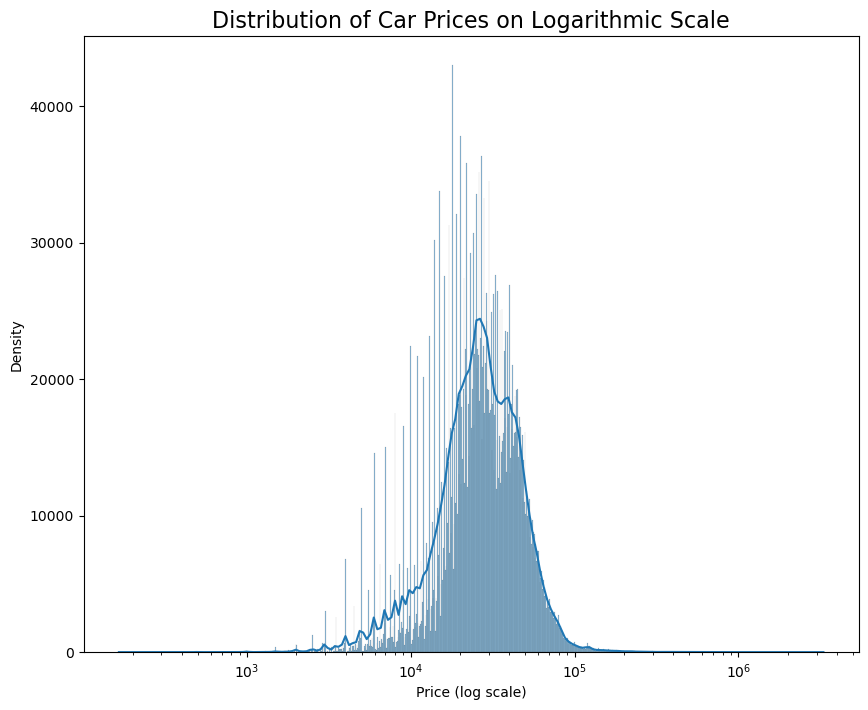

In [76]:
# Visualization of price
plt.figure(figsize=(10, 8))
sns.histplot(df['price'], kde=True, log_scale=True)
plt.title('Distribution of Car Prices on Logarithmic Scale', fontsize=16)
plt.xlabel('Price (log scale)')
plt.ylabel('Density')
plt.show()

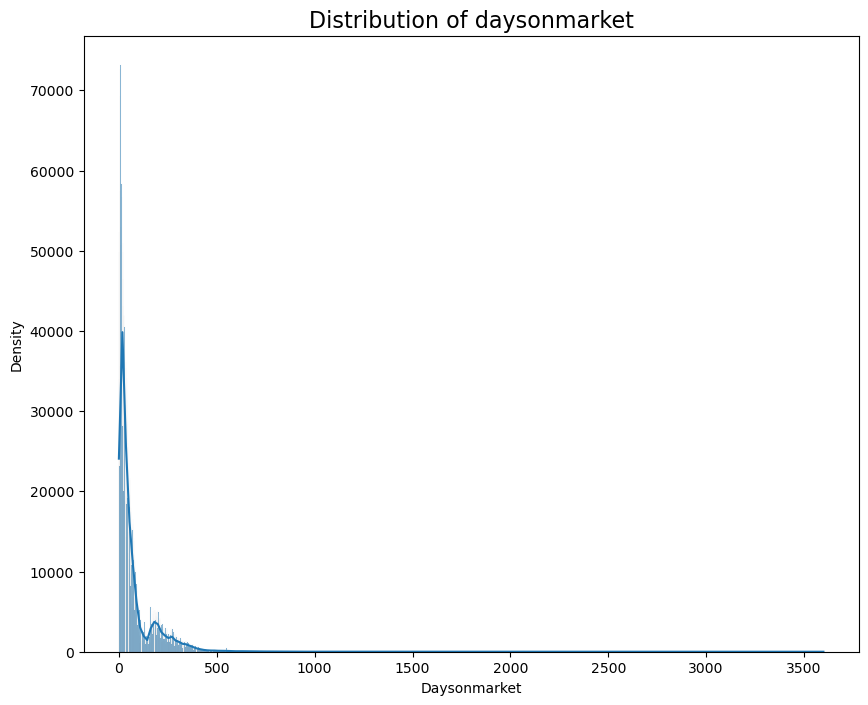

In [77]:
# Visualize daysonmarket distribution 
plt.figure(figsize=(10, 8))
sns.histplot(df['daysonmarket'], kde=True)
plt.title('Distribution of daysonmarket', fontsize=16)
plt.xlabel('Daysonmarket')
plt.ylabel('Density')
plt.show()

###  Visualize the distributions of some numerical values

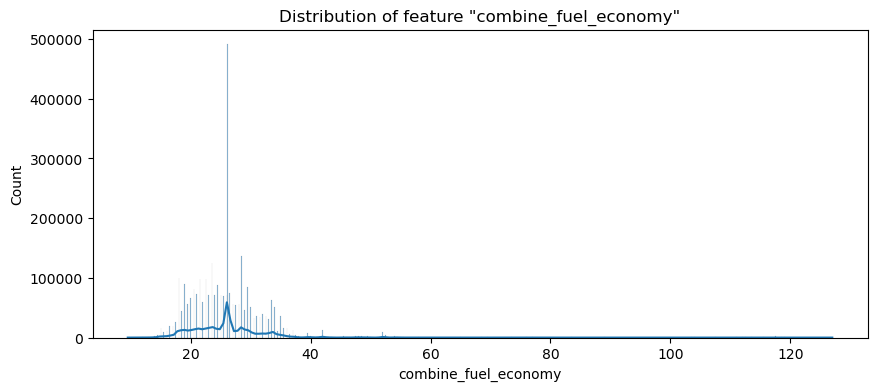

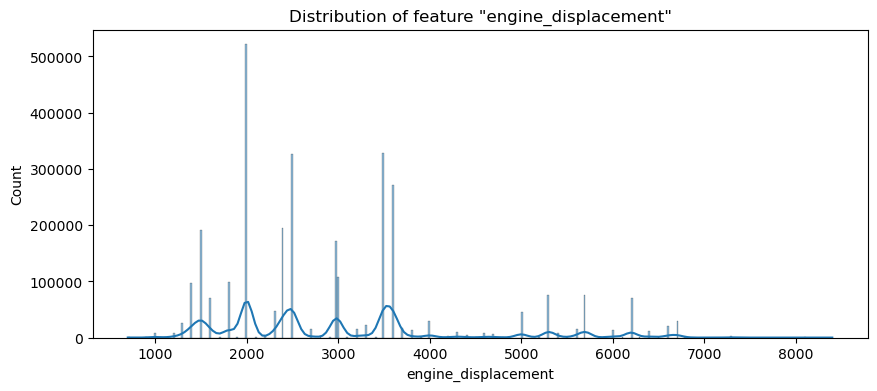

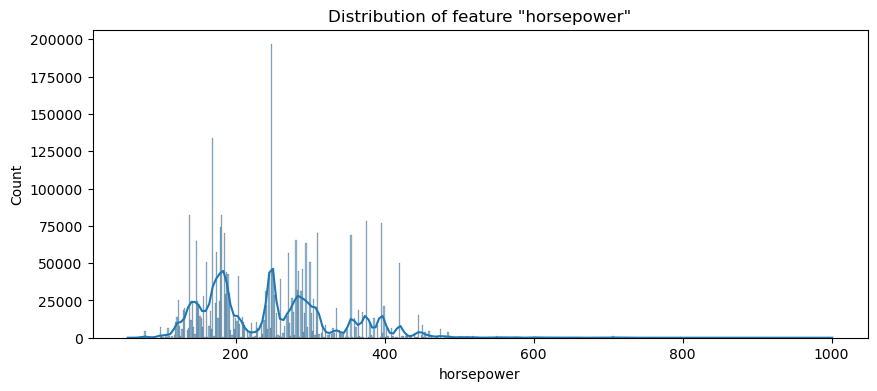

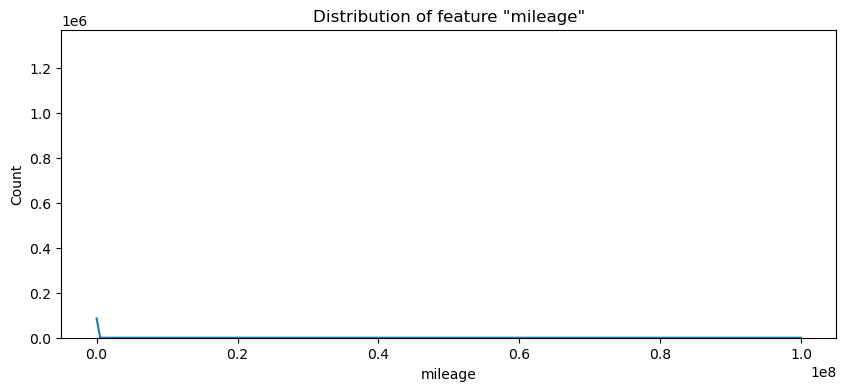

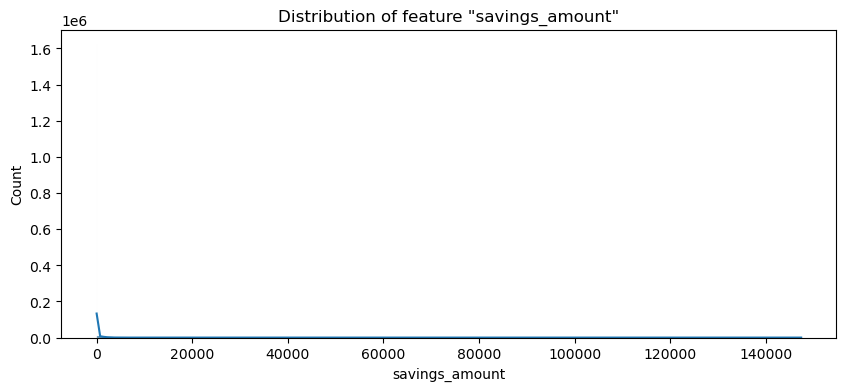

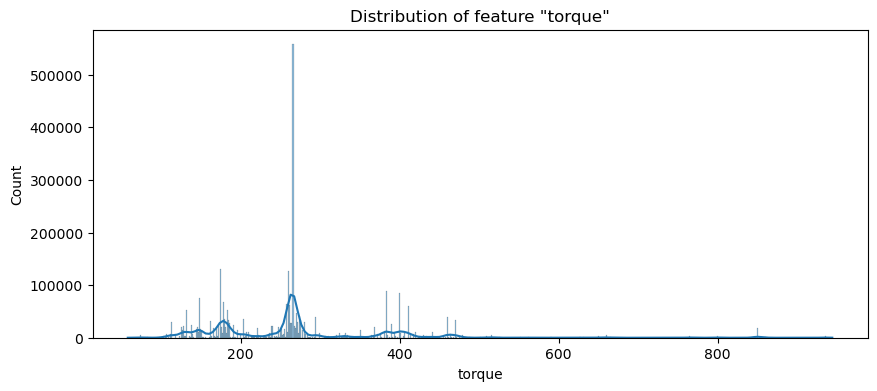

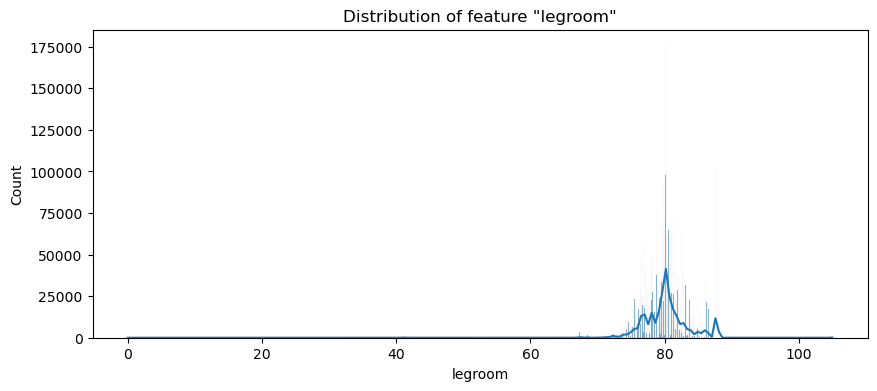

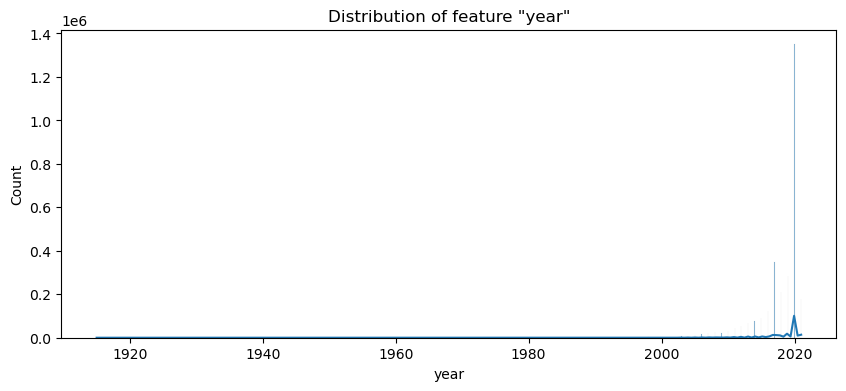

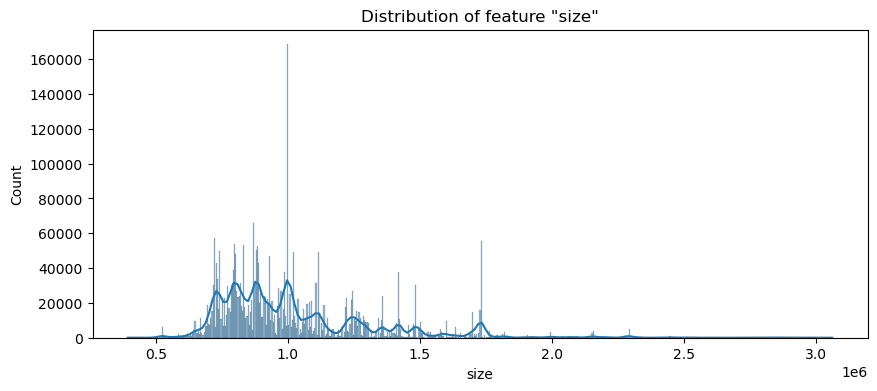

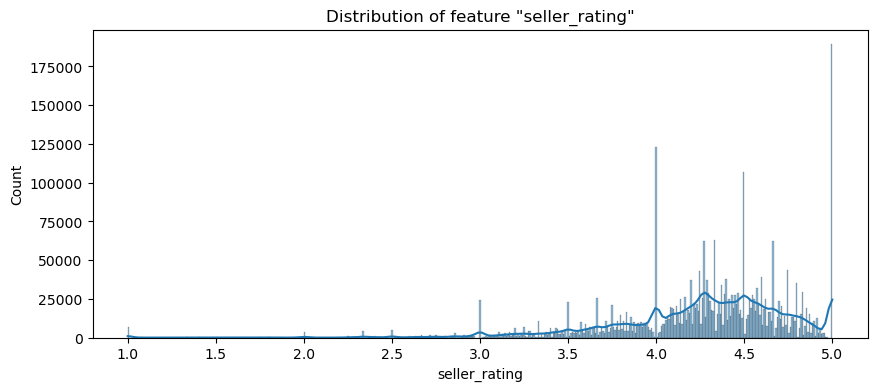

In [78]:
numerical_features = ['combine_fuel_economy', "engine_displacement", "horsepower", 
                     "mileage", "savings_amount", "torque", "legroom", "year", "size", "seller_rating"]



for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of feature "{feature}"')
    plt.show()



## Remove outliers and drop duplicate rows

In [79]:
# Let's remove outliers of numerical features
# For features which remotely look gaussian we use 95 % rule for the mean and standard deviation
# For features which are weighted in the beginning or end we use 95 % or 5 % quantiles

print(f"Size of the dataset: {len(df)} rows")

combine_mean = df["combine_fuel_economy"].mean()
combine_std = df["combine_fuel_economy"].std()

df = df[(df["combine_fuel_economy"]>= combine_mean-2*combine_std) & (df["combine_fuel_economy"] <= combine_mean + 2*combine_std)]

print(f"Size of the dataset after removing outliers: {len(df)} rows")


Size of the dataset: 3000040 rows
Size of the dataset after removing outliers: 2935657 rows


In [80]:
print(f"Size of the dataset: {len(df)} rows")

engine_mean = df["engine_displacement"].mean()
engine_std = df["engine_displacement"].std()

df = df[(df["engine_displacement"]>= engine_mean-2*engine_std) & (df["engine_displacement"] <= engine_mean + 2*engine_std)]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2935657 rows
Size of the dataset after removing outliers: 2708715 rows


In [81]:
print(f"Size of the dataset: {len(df)} rows")

horsepower_mean = df["horsepower"].mean()
horsepower_std = df["horsepower"].std()

df = df[(df["horsepower"]>= horsepower_mean-2*horsepower_std) & (df["horsepower"] <= horsepower_mean + 2*horsepower_std)]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2708715 rows
Size of the dataset after removing outliers: 2617657 rows


In [82]:
print(f"Size of the dataset: {len(df)} rows")

price_mean = df["price"].mean()
price_std = df["price"].std()

df = df[(df["price"]>= price_mean-2*price_std) & (df["price"] <= price_mean + 2*price_std)]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2617657 rows
Size of the dataset after removing outliers: 2535271 rows


In [83]:
print(f"Size of the dataset: {len(df)} rows")

torque_mean = df["torque"].mean()
torque_std = df["torque"].std()

df = df[(df["torque"]>= torque_mean-2*torque_std) & (df["torque"] <= torque_mean + 2*torque_std)]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2535271 rows
Size of the dataset after removing outliers: 2394405 rows


In [84]:
print(f"Size of the dataset: {len(df)} rows")

legroom_mean = df["legroom"].mean()
legroom_std = df["legroom"].std()

df = df[(df["legroom"]>= legroom_mean-2*legroom_std) & (df["legroom"] <= legroom_mean + 2*legroom_std)]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2394405 rows
Size of the dataset after removing outliers: 2296049 rows


In [85]:
print(f"Size of the dataset: {len(df)} rows")

size_mean = df["size"].mean()
size_std = df["size"].std()

df = df[(df["size"]>= size_mean-2*size_std) & (df["size"] <= size_mean + 2*size_std)]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2296049 rows
Size of the dataset after removing outliers: 2229729 rows


In [86]:
# We use quantiles for features which distributions are strongly weighted in the beginning or in the end (are "skewed")

print(f"Size of the dataset: {len(df)} rows")

daysonmarket_95 = df["daysonmarket"].quantile(0.95)

df = df[df["daysonmarket"]<= daysonmarket_95]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2229729 rows
Size of the dataset after removing outliers: 2118545 rows


In [87]:
print(f"Size of the dataset: {len(df)} rows")

mileage_95 = df["mileage"].quantile(0.95)

df = df[df["mileage"]<= mileage_95]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2118545 rows
Size of the dataset after removing outliers: 2012620 rows


In [88]:
print(f"Size of the dataset: {len(df)} rows")

savings_95 = df["savings_amount"].quantile(0.95)

df = df[df["savings_amount"]<= savings_95]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 2012620 rows
Size of the dataset after removing outliers: 1912046 rows


In [89]:
print(f"Size of the dataset: {len(df)} rows")

year_95 = df["year"].quantile(0.05)

df = df[df["year"]>= year_95]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 1912046 rows
Size of the dataset after removing outliers: 1837176 rows


In [90]:
print(f"Size of the dataset: {len(df)} rows")

rating_95 = df["seller_rating"].quantile(0.05)

df = df[df["seller_rating"]>= rating_95]

print(f"Size of the dataset after removing outliers: {len(df)} rows")

Size of the dataset: 1837176 rows
Size of the dataset after removing outliers: 1746016 rows


In [91]:
# Now after feature engineering there are duplicate rows in the data, let's drop them
duplicates = df.duplicated().sum()
print(f"Amount of duplicate rows: {duplicates}")

Amount of duplicate rows: 46668


In [92]:
print(f"Size of the dataset: {len(df)} rows")

df.drop_duplicates(inplace = True)

print(f"Size of the dataset after dropping duplicates: {len(df)} rows")

Size of the dataset: 1746016 rows
Size of the dataset after dropping duplicates: 1699348 rows


In [93]:
duplicates = df.duplicated().sum()
print(f"Amount of duplicate rows: {duplicates}")

Amount of duplicate rows: 0


## Check the properties of the data after cleaning

In [94]:
df.reset_index(drop = True, inplace = True)
df

,body_type,combine_fuel_economy,daysonmarket,engine_displacement,engine_type,fuel_type,horsepower,interior_color,listing_color,major_options,...,model_name,price,savings_amount,seller_rating,torque,transmission,wheel_system,year,legroom,size
0,6,31.50000,55,1500.0,6,5,160.0,26380,10,14.0,...,793,14639.0,1749,3.447761,184.000000,0,3,2018,80.1,814911.040
1,5,22.50000,83,3600.0,22,5,310.0,17237,12,19.0,...,1298,26343.0,1685,3.447761,266.000000,0,3,2018,79.4,1135326.586
2,5,26.08331,76,2400.0,6,5,182.0,26380,13,13.0,...,480,16224.0,1836,3.447761,172.000000,0,3,2017,81.1,943577.950
3,5,27.50000,16,2400.0,6,5,180.0,2419,12,10.0,...,1044,14849.0,1652,3.447761,175.000000,3,0,2016,76.3,881898.140
4,5,26.08331,84,2400.0,6,5,182.0,26380,0,10.0,...,480,12979.0,1687,3.447761,272.000000,0,2,2015,81.1,902731.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699343,5,29.00000,16,1500.0,6,5,170.0,2419,10,4.0,...,480,17998.0,381,4.272727,265.218651,0,3,2018,80.6,869386.024
1699344,5,22.50000,171,3600.0,22,5,310.0,26380,0,6.0,...,1298,36490.0,0,4.533333,266.000000,0,3,2020,79.4,1135326.586
1699345,6,26.08331,91,2000.0,6,5,240.0,2419,4,3.0,...,564,12990.0,462,4.142857,270.000000,0,3,2016,82.6,931625.990
1699346,6,35.00000,11,2000.0,8,2,180.0,16734,5,5.0,...,1386,26998.0,849,4.272727,318.000000,0,2,2017,76.5,836891.691


In [95]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699348 entries, 0 to 1699347
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   body_type             1699348 non-null  int64  
 1   combine_fuel_economy  1699348 non-null  float64
 2   daysonmarket          1699348 non-null  int64  
 3   engine_displacement   1699348 non-null  float64
 4   engine_type           1699348 non-null  int64  
 5   fuel_type             1699348 non-null  int64  
 6   horsepower            1699348 non-null  float64
 7   interior_color        1699348 non-null  int64  
 8   listing_color         1699348 non-null  int64  
 9   major_options         1699348 non-null  float64
 10  make_name             1699348 non-null  int64  
 11  mileage               1699348 non-null  float64
 12  model_name            1699348 non-null  int64  
 13  price                 1699348 non-null  float64
 14  savings_amount        1699348 non-

In [96]:
print("The amount of unique values of features: ")
df.nunique()

The amount of unique values of features: 


body_type                    9
combine_fuel_economy        56
daysonmarket               289
engine_displacement         32
engine_type                 26
fuel_type                    7
horsepower                 200
interior_color           26952
listing_color               15
major_options               49
make_name                   42
mileage                 121156
model_name                 539
price                    50272
savings_amount            2246
seller_rating             1577
torque                     171
transmission                 4
wheel_system                 5
year                        10
legroom                    154
size                      1538
dtype: int64

In [97]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,body_type,combine_fuel_economy,daysonmarket,engine_displacement,engine_type,fuel_type,horsepower,interior_color,listing_color,major_options,...,model_name,price,savings_amount,seller_rating,torque,transmission,wheel_system,year,legroom,size
count,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,...,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0,1699348.0
mean,5.1,26.9,59.0,2444.9,10.1,5.0,215.6,12628.0,7.2,6.1,...,696.4,26497.6,373.0,4.3,222.4,0.2,2.5,2018.6,79.7,918135.5
std,1.0,4.3,66.8,756.9,7.5,0.3,58.9,12997.6,5.1,3.2,...,381.3,10597.7,565.3,0.4,57.0,0.5,0.9,2.1,2.2,154361.3
min,0.0,13.5,0.0,1000.0,0.0,0.0,98.0,5.0,0.0,1.0,...,5.0,349.0,0.0,3.3,98.0,0.0,0.0,2012.0,74.0,597004.2
25%,5.0,23.5,14.0,2000.0,6.0,5.0,170.0,2419.0,1.0,4.0,...,371.0,18711.0,0.0,4.1,175.0,0.0,2.0,2017.0,78.2,797405.2
50%,5.0,26.1,34.0,2400.0,6.0,5.0,192.0,4197.0,9.0,6.0,...,626.0,24955.0,0.0,4.4,255.0,0.0,3.0,2020.0,80.1,886784.6
75%,6.0,29.5,72.0,2968.5,22.0,5.0,270.0,20745.0,12.0,8.0,...,1034.0,32727.0,632.0,4.6,265.2,0.0,3.0,2020.0,81.1,1008223.7
max,8.0,41.0,288.0,5600.0,33.0,6.0,390.0,45724.0,14.0,53.0,...,1428.0,57975.0,2245.0,5.0,385.0,3.0,4.0,2021.0,85.2,1305764.5


In [98]:
print("Column values of the fifth car: \n")
for column in df.columns:
    value = df.loc[4, column]
    print(f"{column}: {value}")


Column values of the fifth car: 

body_type: 5
combine_fuel_economy: 26.08331024751321
daysonmarket: 84
engine_displacement: 2400.0
engine_type: 6
fuel_type: 5
horsepower: 182.0
interior_color: 26380
listing_color: 0
major_options: 10.0
make_name: 16
mileage: 61421.0
model_name: 480
price: 12979.0
savings_amount: 1687
seller_rating: 3.4477611940298507
torque: 272.0
transmission: 0
wheel_system: 2
year: 2015
legroom: 81.1
size: 902731.45


## Correlations for numerical features

In [99]:
# Let's calculate and visualize the correlation matrices for numerical features.

numerical_features = ['combine_fuel_economy', 'engine_displacement', 'horsepower', 'mileage', 
                      'savings_amount', 'torque', 'legroom', 'year', 'size', 'seller_rating', 'price', 'daysonmarket', 'major_options']

df_numerical = df[numerical_features]

pearson_correlation_matrix = df_numerical.corr(method="pearson")
print(pearson_correlation_matrix)

                      combine_fuel_economy  engine_displacement  horsepower  \
combine_fuel_economy              1.000000            -0.626606   -0.692215   
engine_displacement              -0.626606             1.000000    0.776468   
horsepower                       -0.692215             0.776468    1.000000   
mileage                          -0.095320             0.138201    0.040599   
savings_amount                   -0.082142             0.101886    0.071587   
torque                           -0.526705             0.547058    0.817845   
legroom                          -0.035608             0.133685    0.152031   
year                              0.086214            -0.114119   -0.031328   
size                             -0.683835             0.631105    0.704058   
seller_rating                    -0.047697             0.011841    0.049311   
price                            -0.357916             0.336783    0.550160   
daysonmarket                      0.014332          

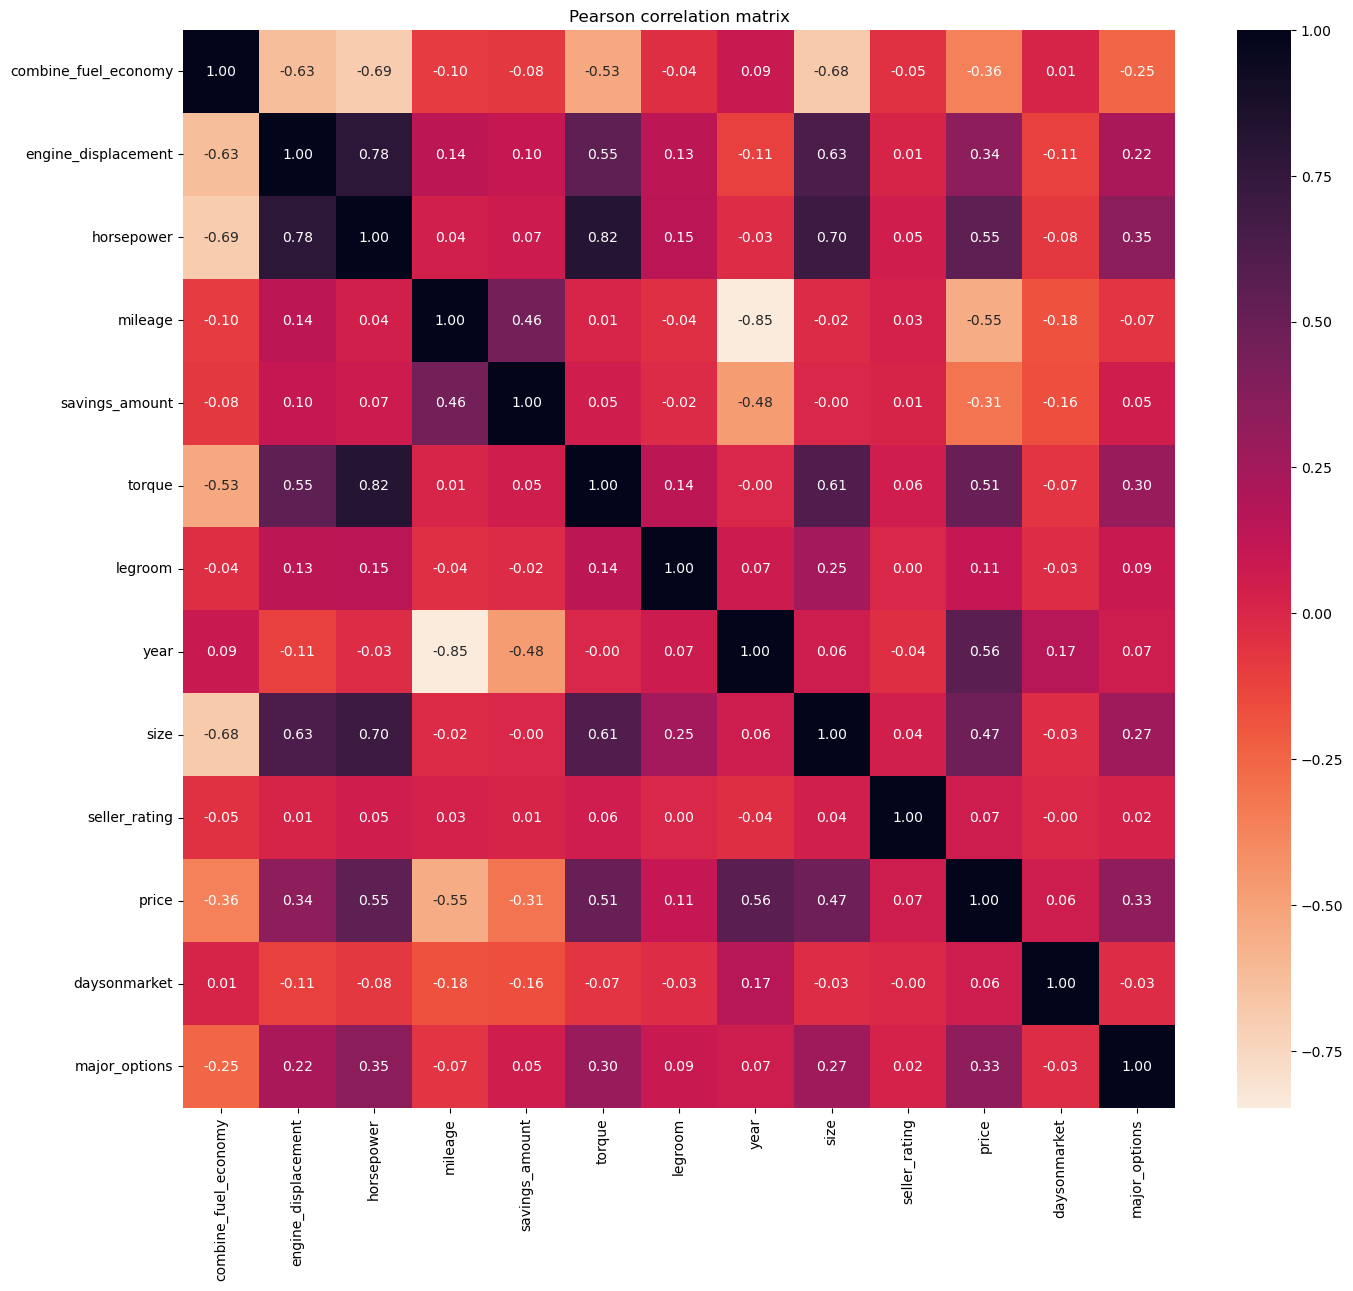

In [100]:
plt.figure(figsize=(16, 14))
sns.heatmap(pearson_correlation_matrix,  cmap = "rocket_r", annot = True, fmt = ".2f")
plt.title("Pearson correlation matrix")
plt.show()


<Axes: title={'center': 'Combined fuel economy vs. Price'}, xlabel='combine_fuel_economy', ylabel='price'>

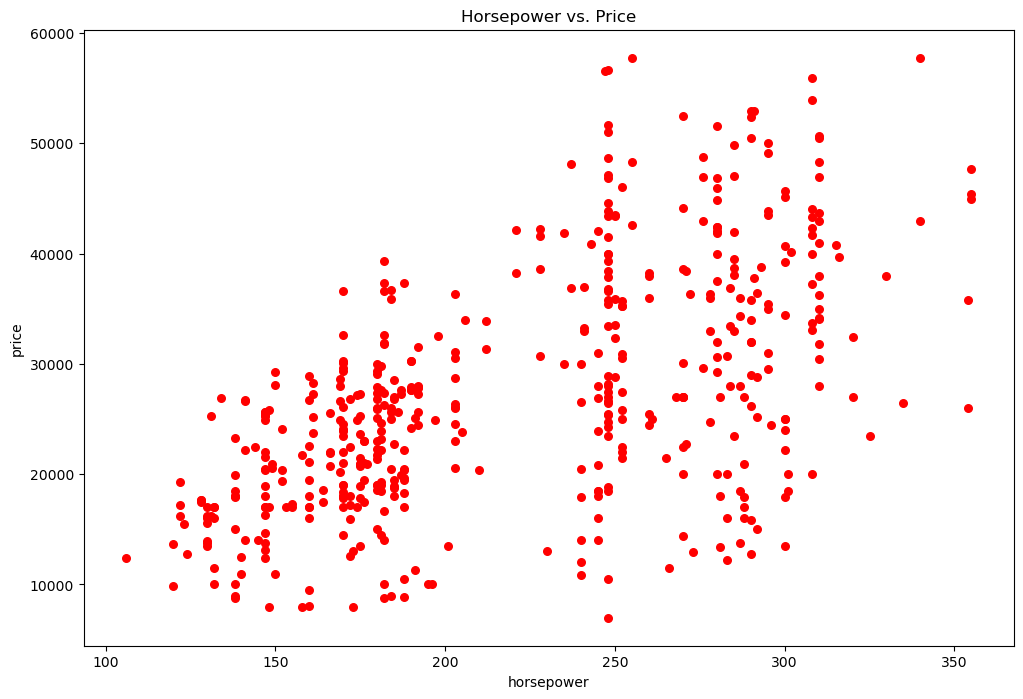

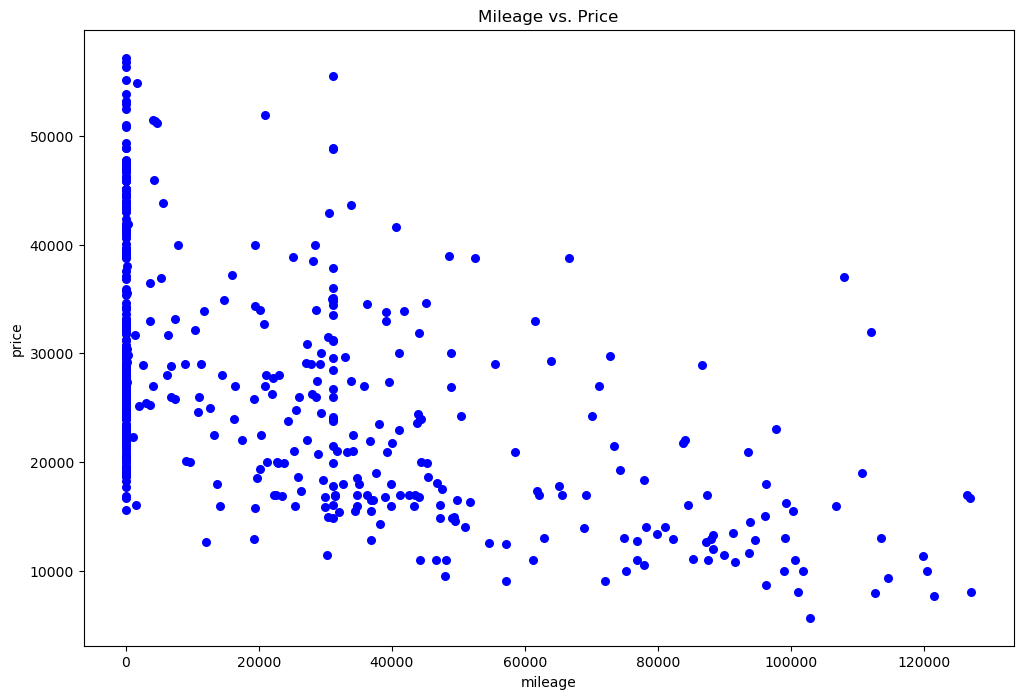

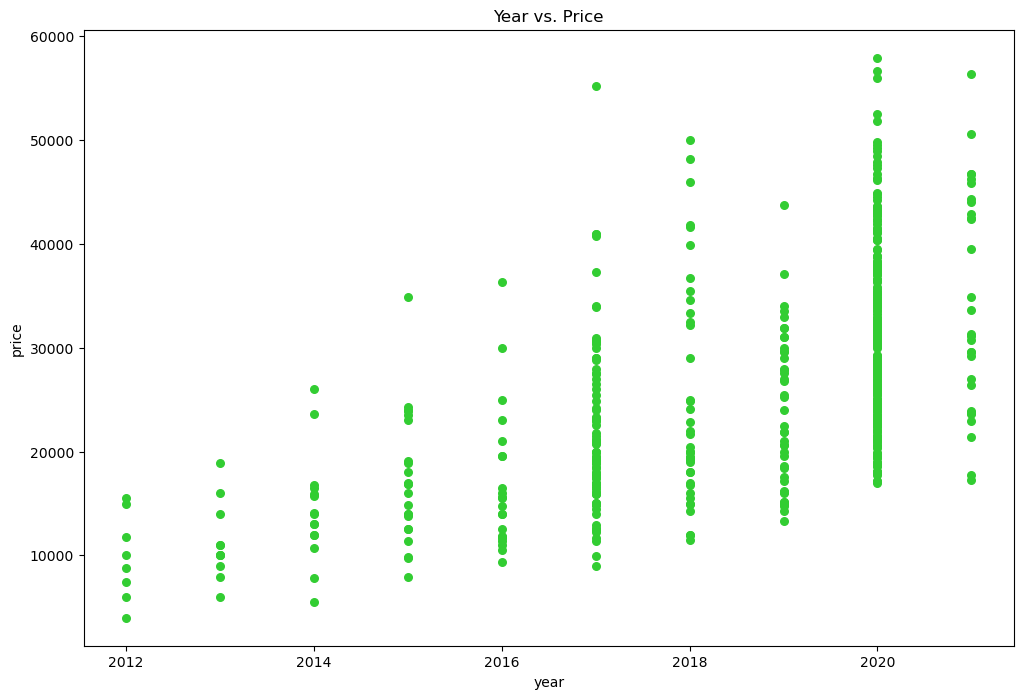

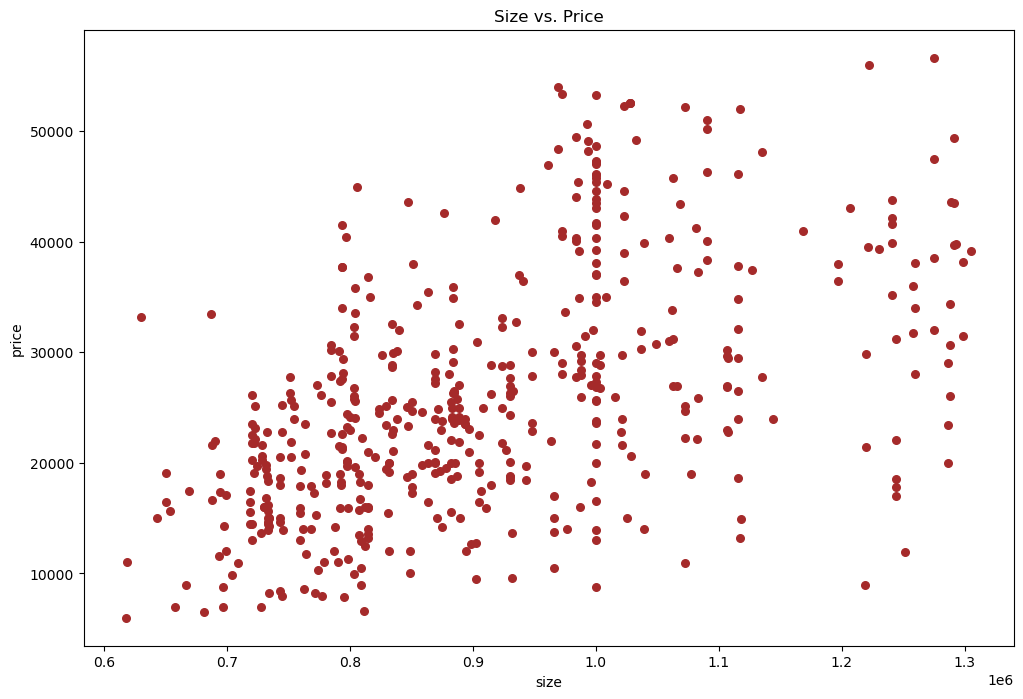

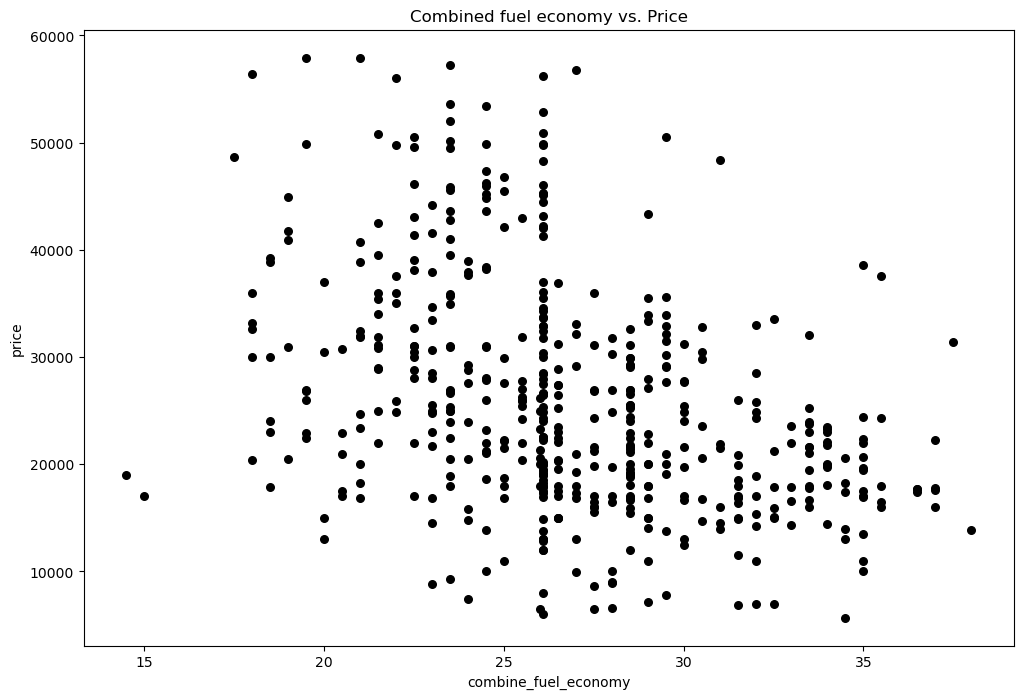

In [101]:
# Let's visualize the correlations between the feature price and some other numerical features

df.sample(n= 500).plot(kind = "scatter", x = "horsepower", y = "price", figsize = (12, 8), color = "red",
                        title = "Horsepower vs. Price", s=30)

df.sample(n= 500).plot(kind = "scatter", x = "mileage", y = "price", figsize = (12, 8), color = "blue",
                        title = "Mileage vs. Price", s=30)

df.sample(n= 500).plot(kind = "scatter", x = "year", y = "price", figsize = (12, 8), color = "limegreen",
                        title = "Year vs. Price", s=30)

df.sample(n= 500).plot(kind = "scatter", x = "size", y = "price", figsize = (12, 8), color = "brown",
                        title = "Size vs. Price", s=30)

df.sample(n= 500).plot(kind = "scatter", x = "combine_fuel_economy", y = "price", figsize = (12, 8), color = "black",
                        title = "Combined fuel economy vs. Price", s=30)

## Save the Prepared Data
Save cleaned and processed data.

In [102]:
# Save the cleaned and prepared dataset
df.to_csv("used_cars_cleaned.csv", index=False)